In [43]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

In [34]:
train_dir ="Link to your training directory" 
test_dir = "Link to your validation directory"

In [35]:
generator = image.ImageDataGenerator(rescale=1./255)

In [36]:
train_datagen = generator.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary',batch_size=20)

Found 1314 images belonging to 2 classes.


In [40]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (150,150,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)       

3
0.0


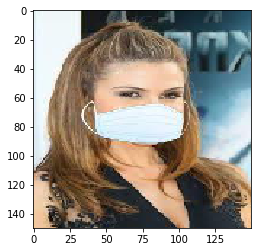

In [41]:
i = int(input())
plt.imshow(train_datagen[0][0][i])
print(train_datagen[0][1][i])

In [42]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

In [44]:
class myCallback(callbacks.Callback):
    def on_epoch_end(self,epoch,logs= {}):
        if logs.get('accuracy')>0.99:
            print('Cancelling Training!')
            self.model.stop_training = True
callback = myCallback()

In [45]:
model.fit(train_datagen,epochs = 10, callbacks = [callback])

W0707 17:24:10.359653 14184 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 66 steps
Epoch 1/10
66/66 [==============================] - 63s 949ms/step - loss: 0.6487 - accuracy: 0.6469
Epoch 2/10
66/66 [==============================] - 63s 955ms/step - loss: 0.2658 - accuracy: 0.9011
Epoch 3/10
66/66 [==============================] - 63s 958ms/step - loss: 0.2378 - accuracy: 0.9330
Epoch 4/10
66/66 [==============================] - 65s 984ms/step - loss: 0.1685 - accuracy: 0.9315
Epoch 5/10
66/66 [==============================] - 64s 964ms/step - loss: 0.1211 - accuracy: 0.9566
Epoch 6/10
66/66 [==============================] - 63s 959ms/step - loss: 0.1148 - accuracy: 0.9642
Epoch 7/10
66/66 [==============================] - 64s 969ms/step - loss: 0.0982 - accuracy: 0.9673
Epoch 8/10
66/66 [==============================] - 63s 961ms/step - loss: 0.0814 - accuracy: 0.9772
Epoch 9/10
66/66 [==============================] - 65s 980ms/step - loss: 0.0535 - accuracy: 0.9840
Epoch 10/10
66/66 [==============================] - 65s 982ms/step - lo

In [38]:
validation_generator = image.ImageDataGenerator(rescale=1./255)
validation_datagen = validation_generator.flow_from_directory(test_dir,target_size=(150,150),class_mode='binary',batch_size=20)

Found 194 images belonging to 2 classes.


In [47]:
model.evaluate(validation_datagen)

W0707 19:35:17.404413 14184 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


10/10 [==============================] - 4s 358ms/step - loss: 0.1902 - accuracy: 0.9742


[0.19020035527264553, 0.97422683]

### We are getting 97% accuracy on the validation data